# Intuitive Issuer Analysis

In [1]:
from analysis_helpers.intercept_helpers import combine_dfs, convert_np_array, get_cert_valid_columns
import pandas as pd
import os
import seaborn as sns
from datetime import datetime

In [2]:
BASE_PATH = "/mnt/chaseproject/uva/kd5eyn/ca_data/intuitive/"
files = os.listdir(BASE_PATH)
dfs = []

In [3]:
for file in files:
    dfs.append(pd.read_parquet(BASE_PATH + file))
for i, df in enumerate(dfs):
    dfs[i] = df[df["issuer_O"] == "Intuitive"].copy()
    dfs[i].drop(columns=["client_cert_chain_fps", "cert_chain_fps"], inplace=True)

base_df = dfs[0]
for df in dfs[1:]:
    base_df = pd.concat([base_df, df])

In [4]:
base_df.columns

Index(['fingerprint', '_lpp_ver', 'anon_orig', 'anon_resp', 'cipher', 'curve',
       'established', 'id_orig_h', 'id_orig_p', 'id_resp_h', 'id_resp_p',
       'ja3', 'ja3s', 'last_alert', 'next_protocol', 'resumed', 'server_name',
       'sni_matches_cert', 'ssl_history', 'ts', 'uid', 'validation_status',
       'version', 'anon_san_dns', 'anon_san_ip', 'anon_san_uri',
       'basic_constraints_ca', 'basic_constraints_path_len',
       'certificate_curve', 'certificate_exponent', 'issuer',
       'certificate_key_alg', 'certificate_key_length', 'certificate_key_type',
       'certificate_not_valid_after', 'certificate_not_valid_before',
       'certificate_serial', 'certificate_sig_alg', 'certificate_subject',
       'certificate_version', 'client_cert', 'host_cert', 'san_dns',
       'san_email', 'san_ip', 'san_uri', 'issuer_O', 'domain'],
      dtype='object')

**Data Collection**
* Dates in Sample: 5/1/2022, 5/7/2022, 5/15/2022, 5/23/2022, 5/31/2022
* Dates where Intuitive Issuer Present: 5/1/2022, 5/15/2022, 5/23/2022

In [5]:
base_df

,fingerprint,_lpp_ver,anon_orig,anon_resp,cipher,curve,established,id_orig_h,id_orig_p,id_resp_h,...,certificate_subject,certificate_version,client_cert,host_cert,san_dns,san_email,san_ip,san_uri,issuer_O,domain
0,0474cb03a4274884f52fb9128f012b5fde2581408315b9...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,3768,161.69.116.134,...,"CN=gameplay.intel.com,O=Intel Corporation,L=Sa...",3,False,True,"[gameplay.intel.com, *.intel.com, intel.com]",None,None,None,Intuitive,gameplay.intel.com
1,673a4cd08a82acbf241b3b9514db5f0aef8de0010480d9...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,33471,161.69.116.134,...,"CN=*.intouchreports.com,O=InTouch Health,L=Gol...",3,False,True,"[*.intouchreports.com, intouchreports.com]",None,None,None,Intuitive,None
2,69ad31e1bc33d92510109020477c2210a24ec1fd719fff...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,23807,161.69.116.134,...,"CN=*.intouchreports.com,O=InTouch Health,L=Gol...",3,False,True,"[*.intouchreports.com, intouchreports.com]",None,None,None,Intuitive,None
3,3a06b73ac0a81418b0d7a5857458234d7b4c0fe05d6af5...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,11934,161.69.116.134,...,"CN=*.intouchreports.com,O=InTouch Health,L=Gol...",3,False,True,"[*.intouchreports.com, intouchreports.com]",None,None,None,Intuitive,None
4,77a9539a9db57db50aa71f30df6032bf48b1db7f09bd8b...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,30332,161.69.116.134,...,"CN=devicesapi.intouchhealth.com,O=InTouch Heal...",3,False,True,"[devicesapi.intouchhealth.com, www.devicesapi....",None,None,None,Intuitive,None
5,899c892f065bac49fabeaf5d94ca4ce94af86886aff20a...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,21490,161.69.116.134,...,"CN=*.intouchreports.com,O=InTouch Health,L=Gol...",3,False,True,"[*.intouchreports.com, intouchreports.com]",None,None,None,Intuitive,None
6,1293700e8508312162e3bfc4ebeb6445324f9a77a6b37d...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,56818,161.69.116.134,...,"CN=*.intouchreports.com,O=InTouch Health,L=Gol...",3,False,True,"[*.intouchreports.com, intouchreports.com]",None,None,None,Intuitive,None
7,a1a89e35ed11a9b0d517571f649bd97f3994da1dc4f6b3...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,58528,161.69.116.134,...,"CN=devicesapi.intouchhealth.com,O=InTouch Heal...",3,False,True,"[devicesapi.intouchhealth.com, www.devicesapi....",None,None,None,Intuitive,None
8,1d61fbc850ab8c4cee91e6eb433bac0d306c1d6b6e941a...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,19619,161.69.116.134,...,"CN=wbd.ms,O=Microsoft Corporation,L=Redmond,ST...",3,False,True,"[whiteboard.microsoft.com, wbd.ms, whiteboard....",None,None,None,Intuitive,wbd.ms
9,5a34cd2d4624fb61b787f380449bd57e873980e72a68f2...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,22413,161.69.116.134,...,"CN=whiteboard.ms,O=Microsoft Corporation,L=Red...",3,False,True,"[whiteboard.microsoft.com, wbd.ms, whiteboard....",None,None,None,Intuitive,whiteboard.ms


**Unique IPs** \
Request made from only a single IP.

In [6]:
base_df["id_orig_h"].unique()

array(['137.54.126.1'], dtype=object)

**Domains that were logged with an Intuitive Leaf Certificate**

In [7]:
base_df["domain"].unique()

array(['gameplay.intel.com', None, 'wbd.ms', 'whiteboard.ms',
       'static.dataservices.hp.com', 'code.jquery.com', 'api.msn.com',
       'www.bing.com'], dtype=object)

[Text(0.5, 1.0, 'Domains Logged with Intuitive CA')]

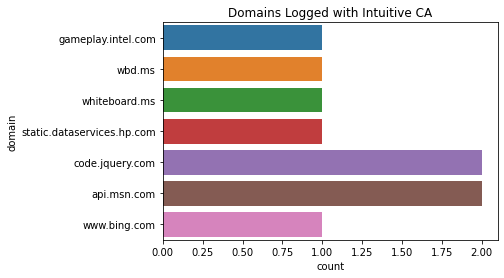

In [8]:
sns.countplot(y="domain", data=base_df, orient="h").set(title="Domains Logged with Intuitive CA")

**Certificates issued by Intuitive CA**

[Text(0.5, 1.0, 'Logged Certificate Serials')]

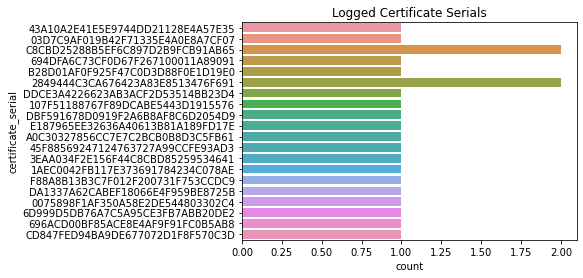

In [9]:
sns.countplot(y="certificate_serial", data=base_df, orient="h").set(title="Logged Certificate Serials")

In [10]:
def get_num_valid(timestamp: datetime, not_before: datetime, not_after: datetime):
    return timestamp > not_before and timestamp < not_after

In [11]:
def get_num_days(not_before_str: datetime, not_after_str: datetime):
    not_before_string = not_before_str[:-8]
    not_after_string = not_after_str[:-8]
    not_before = datetime.strptime(not_before_string, "%Y-%m-%dT%H:%M:%S")
    not_after = datetime.strptime(not_after_string, "%Y-%m-%dT%H:%M:%S")
    return not_after - not_before

In [12]:
cert_valid_df = get_cert_valid_columns(base_df)

In [13]:
cert_valid_df[["certificate_serial", "ts", "certificate_not_valid_before", "certificate_not_valid_after", "cert_validity"]]

,certificate_serial,ts,certificate_not_valid_before,certificate_not_valid_after,cert_validity
0,43A10A2E41E5E9744DD21128E4A57E35,2022-05-23T16:31:17.377576Z,2022-05-23T10:23:49.000000Z,2023-05-23T10:23:49.000000Z,True
1,03D7C9AF019B42F71335E4A0E8A7CF07,2022-05-23T16:34:28.187893Z,2022-05-23T09:34:12.000000Z,2023-05-23T09:34:12.000000Z,True
2,C8CBD25288B5EF6C897D2B9FCB91AB65,2022-05-23T16:39:28.334947Z,2022-05-23T10:04:17.000000Z,2023-05-23T10:04:17.000000Z,True
3,694DFA6C73CF0D67F267100011A89091,2022-05-23T16:44:03.276509Z,2022-05-23T09:19:16.000000Z,2023-05-23T09:19:16.000000Z,True
4,B28D01AF0F925F47C0D3D88F0E1D19E0,2022-05-23T16:44:04.557638Z,2022-05-23T09:18:54.000000Z,2023-05-23T09:18:54.000000Z,True
5,2849444C3CA676423A83E8513476F691,2022-05-23T16:44:28.351508Z,2022-05-23T09:04:11.000000Z,2023-05-23T09:04:11.000000Z,True
6,DDCE3A4226623AB3ACF2D53514BB23D4,2022-05-23T16:49:52.017296Z,2022-05-23T10:04:17.000000Z,2023-05-23T10:04:17.000000Z,True
7,107F51188767F89DCABE5443D1915576,2022-05-23T16:54:05.222282Z,2022-05-23T09:21:12.000000Z,2023-05-23T09:21:12.000000Z,True
8,DBF591678D0919F2A6B8AF8C6D2054D9,2022-05-23T16:57:33.121912Z,2022-05-23T20:47:33.000000Z,2023-05-23T20:47:33.000000Z,False
9,E187965EE32636A40613B81A189FD17E,2022-05-23T16:57:34.246023Z,2022-05-23T20:47:34.000000Z,2023-05-23T20:47:34.000000Z,False


In [14]:
cert_valid_df[["certificate_serial", "ts", "certificate_not_valid_before", "certificate_not_valid_after", "cert_validity", "num_days_valid"]]

,certificate_serial,ts,certificate_not_valid_before,certificate_not_valid_after,cert_validity,num_days_valid
0,43A10A2E41E5E9744DD21128E4A57E35,2022-05-23T16:31:17.377576Z,2022-05-23T10:23:49.000000Z,2023-05-23T10:23:49.000000Z,True,365
1,03D7C9AF019B42F71335E4A0E8A7CF07,2022-05-23T16:34:28.187893Z,2022-05-23T09:34:12.000000Z,2023-05-23T09:34:12.000000Z,True,365
2,C8CBD25288B5EF6C897D2B9FCB91AB65,2022-05-23T16:39:28.334947Z,2022-05-23T10:04:17.000000Z,2023-05-23T10:04:17.000000Z,True,365
3,694DFA6C73CF0D67F267100011A89091,2022-05-23T16:44:03.276509Z,2022-05-23T09:19:16.000000Z,2023-05-23T09:19:16.000000Z,True,365
4,B28D01AF0F925F47C0D3D88F0E1D19E0,2022-05-23T16:44:04.557638Z,2022-05-23T09:18:54.000000Z,2023-05-23T09:18:54.000000Z,True,365
5,2849444C3CA676423A83E8513476F691,2022-05-23T16:44:28.351508Z,2022-05-23T09:04:11.000000Z,2023-05-23T09:04:11.000000Z,True,365
6,DDCE3A4226623AB3ACF2D53514BB23D4,2022-05-23T16:49:52.017296Z,2022-05-23T10:04:17.000000Z,2023-05-23T10:04:17.000000Z,True,365
7,107F51188767F89DCABE5443D1915576,2022-05-23T16:54:05.222282Z,2022-05-23T09:21:12.000000Z,2023-05-23T09:21:12.000000Z,True,365
8,DBF591678D0919F2A6B8AF8C6D2054D9,2022-05-23T16:57:33.121912Z,2022-05-23T20:47:33.000000Z,2023-05-23T20:47:33.000000Z,False,365
9,E187965EE32636A40613B81A189FD17E,2022-05-23T16:57:34.246023Z,2022-05-23T20:47:34.000000Z,2023-05-23T20:47:34.000000Z,False,365


In [15]:
cert_valid_df[cert_valid_df["domain"].notnull()]

,fingerprint,_lpp_ver,anon_orig,anon_resp,cipher,curve,established,id_orig_h,id_orig_p,id_resp_h,...,client_cert,host_cert,san_dns,san_email,san_ip,san_uri,issuer_O,domain,cert_validity,num_days_valid
0,0474cb03a4274884f52fb9128f012b5fde2581408315b9...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,3768,161.69.116.134,...,False,True,"[gameplay.intel.com, *.intel.com, intel.com]",None,None,None,Intuitive,gameplay.intel.com,True,365
8,1d61fbc850ab8c4cee91e6eb433bac0d306c1d6b6e941a...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,19619,161.69.116.134,...,False,True,"[whiteboard.microsoft.com, wbd.ms, whiteboard....",None,None,None,Intuitive,wbd.ms,False,365
9,5a34cd2d4624fb61b787f380449bd57e873980e72a68f2...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,22413,161.69.116.134,...,False,True,"[whiteboard.microsoft.com, wbd.ms, whiteboard....",None,None,None,Intuitive,whiteboard.ms,False,365
0,8c6f23a82a23f4e49465eeefe403f041c179fd9478ce11...,1.11-7,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,58216,161.69.121.10,...,False,True,"[static-beta.dataservices.hp.com, static.datas...",None,None,None,Intuitive,static.dataservices.hp.com,True,365
1,9cc7760b91009e561cdb06144dbee979041ee2f05bf3b3...,1.11-7,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,58230,161.69.121.10,...,False,True,"[code.jquery.com, *.jquery.com, jquery.com]",None,None,None,Intuitive,code.jquery.com,True,365
2,598569369cda4bb927c249c809068f8aca058612ce4b6f...,1.11-7,uva,none,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,x25519,True,137.54.126.1,58228,161.69.121.10,...,False,True,"[code.jquery.com, *.jquery.com, jquery.com]",None,None,None,Intuitive,code.jquery.com,True,365
0,2ce235b76b5c649f82e5aa290e5d41bb65c1e50e0c7fc0...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,30561,161.69.116.134,...,False,True,"[api.msn.com, *.msn.com, *.services.msn.com, *...",None,NaN,None,Intuitive,api.msn.com,True,365
0,1eee06042385e39de440bdaf2dc88ee459ceb34378858d...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,54253,161.69.116.134,...,False,True,"[www.bing.com, dict.bing.com.cn, *.platform.bi...",None,NaN,None,Intuitive,www.bing.com,True,365
1,a0534ff858a90bc416fe7475bd6bccbd3389b3951369a8...,1.11-9,uva,none,TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384,x25519,True,137.54.126.1,54490,161.69.116.134,...,False,True,"[api.msn.com, *.msn.com, *.services.msn.com, *...",None,NaN,None,Intuitive,api.msn.com,True,365


In [16]:
cert_valid_df[cert_valid_df["domain"].notnull()].iloc[0]["certificate_serial"]

'43A10A2E41E5E9744DD21128E4A57E35'

In [17]:
cert_valid_df[cert_valid_df["domain"].notnull()].iloc[0]["cipher"]

'TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384'

In [18]:
cert_valid_df[cert_valid_df["domain"].notnull()].iloc[1]["certificate_serial"]

'DBF591678D0919F2A6B8AF8C6D2054D9'

In [19]:
cert_valid_df[cert_valid_df["domain"].notnull()].iloc[1]["cipher"]

'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256'

In [20]:
cert_valid_df[cert_valid_df["domain"].notnull()].iloc[1]["version"]

'TLSv12'

In [21]:
from typing import Dict
from tldextract import extract
from analysis_helpers.intercept_helpers import parse_crt, get_cipher_suite_info


def fill_in_table(df: pd.DataFrame, cipher_suite_info: Dict[str, Dict]) -> pd.DataFrame:
    domain_df = df[df["domain"].notnull()].copy(deep=True)
    domain_data = {"domain": [], "2nd-level domain": [], "On-file leaf issuer": [], "Observed leaf issuer": [],
                   "Observed leaf serial number": [], "Observed issuer information/reference": [], "Weakness/vulnerabilities of interception parameters": []}
    weakness_data_format = "Validity Period: {validity_period} \n Cipher Suite: {cipher_suite} \n Cipher Security: {cipher_security} \n TLS Version: {version}"

    for index, row in domain_df.iterrows():
        domain: str = row["domain"]
        domain_parts = extract(domain)
        domain_data["domain"].append(domain)

        second_level_domain = domain.replace(
            domain_parts.subdomain, "").replace(domain_parts.suffix, "").replace(".", "")
        domain_data["2nd-level domain"].append(second_level_domain)

        domain_data["On-file leaf issuer"].append(parse_crt(domain, row["ts"]))
        domain_data["Observed leaf issuer"].append(row["issuer_O"])

        domain_data["Observed leaf serial number"].append(
            row["certificate_serial"])
        domain_data["Observed issuer information/reference"].append("")

        validity_period = str(get_num_days(
            row["certificate_not_valid_before"], row["certificate_not_valid_after"]).days) + " days"
        cipher_suite = row["cipher"]
        cipher_security = cipher_suite_info[cipher_suite]["security"]
        version = row["version"]

        domain_data["Weakness/vulnerabilities of interception parameters"].append(weakness_data_format.format(validity_period=validity_period, cipher_suite=cipher_suite, cipher_security=cipher_security, version=version))
    
    return pd.DataFrame.from_dict(domain_data)

In [22]:
base_df["cipher"].unique()

array(['TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384',
       'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256'], dtype=object)

In [23]:
cipher_suite_info = get_cipher_suite_info(base_df["cipher"].unique())
result_df = fill_in_table(base_df, cipher_suite_info)

In [24]:
pd.set_option("max_colwidth", None)
result_df

,domain,2nd-level domain,On-file leaf issuer,Observed leaf issuer,Observed leaf serial number,Observed issuer information/reference,Weakness/vulnerabilities of interception parameters
0,gameplay.intel.com,intel,"['Sectigo Limited (2022-02-10 - 2023-02-10)', 'Amazon (2021-09-29 - 2022-10-28)', '""GoDaddy.com, Inc."" (2018-07-06 - 2019-07-06)', 'COMODO CA Limited (2015-05-26 - 2018-05-25)']",Intuitive,43A10A2E41E5E9744DD21128E4A57E35,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384 \n Cipher Security: secure \n TLS Version: TLSv12
1,wbd.ms,wbd,"['Microsoft Corporation (2017-02-17 - 2018-03-17)', 'DigiCert Inc (2022-04-27 - 2023-04-26)', 'GlobalSign nv-sa (2020-08-12 - 2022-08-13)']",Intuitive,DBF591678D0919F2A6B8AF8C6D2054D9,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 \n Cipher Security: secure \n TLS Version: TLSv12
2,whiteboard.ms,whiteboard,"['Microsoft Corporation (2017-05-19 - 2018-02-19)', 'DigiCert Inc (2022-04-27 - 2023-04-26)', 'GlobalSign nv-sa (2020-08-12 - 2022-08-13)']",Intuitive,E187965EE32636A40613B81A189FD17E,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 \n Cipher Security: secure \n TLS Version: TLSv12
3,static.dataservices.hp.com,hp,"['DigiCert Inc (2021-10-05 - 2022-10-05)', 'Symantec Corporation (2015-10-07 - 2016-10-07)', '""VeriSign, Inc."" (2014-10-10 - 2015-10-11)']",Intuitive,F88A8B13B3C7F012F200731F753CCDC9,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 \n Cipher Security: secure \n TLS Version: TLSv12
4,code.jquery.com,jquery,"['Sectigo Limited (2020-10-06 - 2021-10-16)', 'COMODO CA Limited (2018-10-17 - 2020-10-16)', ""Let's Encrypt (2018-04-11 - 2018-07-10)"", 'GlobalSign nv-sa (2014-07-31 - 2015-07-31)', 'AlphaSSL (2013-08-07 - 2014-07-31)']",Intuitive,DA1337A62CABEF18066E4F959BE8725B,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 \n Cipher Security: secure \n TLS Version: TLSv12
5,code.jquery.com,jquery,"['Sectigo Limited (2020-10-06 - 2021-10-16)', 'COMODO CA Limited (2018-10-17 - 2020-10-16)', ""Let's Encrypt (2018-04-11 - 2018-07-10)"", 'GlobalSign nv-sa (2014-07-31 - 2015-07-31)', 'AlphaSSL (2013-08-07 - 2014-07-31)']",Intuitive,0075898F1AF350A58E2DE544803302C4,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 \n Cipher Security: secure \n TLS Version: TLSv12
6,api.msn.com,msn,Microsoft Corporation (2020-06-12 - 2022-06-12),Intuitive,6D999D5DB76A7C5A95CE3FB7ABB20DE2,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384 \n Cipher Security: secure \n TLS Version: TLSv12
7,www.bing.com,bing,Microsoft Corporation (2022-04-21 - 2023-04-21),Intuitive,696ACD00BF85ACE8E4AF9F91FC0B5AB8,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384 \n Cipher Security: secure \n TLS Version: TLSv12
8,api.msn.com,msn,Microsoft Corporation (2020-06-12 - 2022-06-12),Intuitive,CD847FED94BA9DE677072D1F8F570C3D,,Validity Period: 365 days \n Cipher Suite: TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384 \n Cipher Security: secure \n TLS Version: TLSv12
